# Persistent Homology analysis of hcp dwi data

## Setup

Define some variables

In [3]:
outdir = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/dwi'
!mkdir -p $outdir

In [4]:
cd $outdir

/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/dwi


In [5]:
subs_file = '../day4/HCP_900_subslist.txt'
subs = [s[:-1] for s in open(subs_file, 'r').readlines()]

In [6]:
fstr_sc33 = '/mnt/jzhpcvl-u1/hcp_wuminn_l2k8_tracks_conmats/data/results/hcp_wuminn/tractography/dipy/l2k8/%s/dsi_sd4/sub-%s_roisc33dwispace/weights.txt'

In [7]:
scriptlines = """

include("/home/jgriffiths/Software/Eirene0_3_5/Eirene0_3_5.jl") \n
include("/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4/banff_spring2017.jl") \n
pathin = "<IN_FILE>" \n
pathout = "<OUT_FILE>" \n
johnsfunction_banff2017_fordwi(pathin, pathout) \n

""" 

Importage

In [8]:
import pandas as pd
import numpy as np
import os,sys,glob

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Tests

In [101]:
f = fstr_sc33 %(subs[50],subs[50])

In [114]:
dat = np.loadtxt(f)
dat = np.triu(dat,k=1)  + np.tril(dat,k=-1)
#dat_symm = np.triu(dat,k=1) + np.tril(dat,k=-1)
dat_symm = (dat + dat.T ) / 2. 
#np.triu(dat) + np.tril(dat)#,k=-1)
dat_symm_norm = dat_symm/dat_symm.max()
dat_symm_norm_dist = 1-dat_symm_norm

#sns.heatmap(dat_symm_norm,vmin=0,vmax=1, xticklabels='',yticklabels='')

np.savetxt('test.csv', dat_symm_norm_dist)#_dist)

run_script_file = 'run_johnsfunction_fordwi.jl'
in_file = 'test.csv'
out_file = in_file.replace('.txt', '_pdxy.csv')
newtxt = scriptlines.replace('<IN_FILE>',in_file)\
                    .replace('<OUT_FILE>',out_file)
open(run_script_file, 'w').write(newtxt)
        
os.system('julia %s' %run_script_file)
    

0

In [117]:
df = pd.read_csv(out_file,header=None)

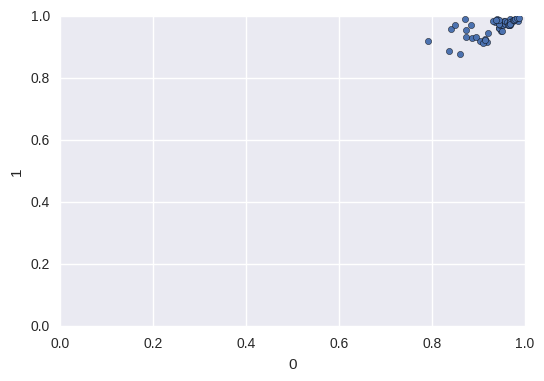

In [118]:
df.plot(kind='scatter',x=0,y=1,xlim=[0,1], ylim=[0,1])

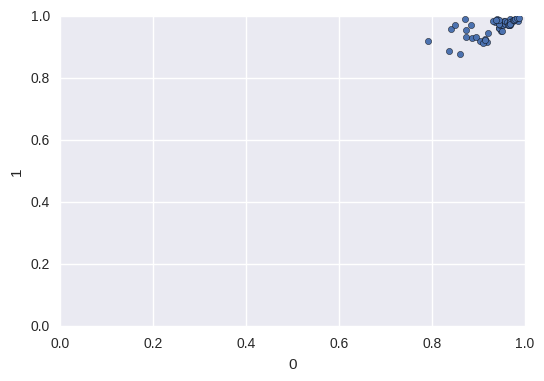

In [116]:
df.plot(kind='scatter',x=0,y=1,xlim=[0,1], ylim=[0,1])

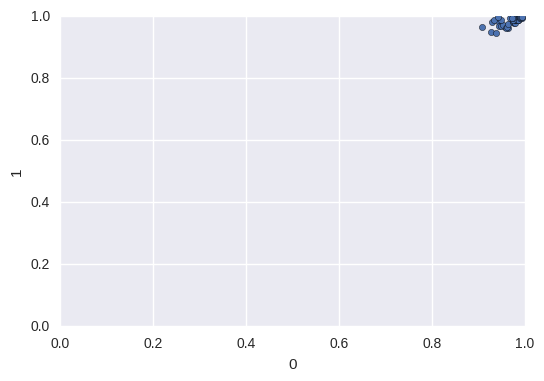

In [112]:
df.plot(kind='scatter',x=0,y=1,xlim=[0,1], ylim=[0,1])

## Scale 33 data

In [10]:
run_script_file = 'run_johnsfunction_fordwi.jl'

In [11]:
subs_to_do = subs#[:50]

In [12]:
for sub in subs_to_do:
    f = fstr_sc33 %(sub,sub)
    if os.path.isfile(f):
    
        in_file = '%s_dwi_sc33_%s' %(sub,os.path.split(f)[-1])
        
        out_file = in_file.replace('.txt', '_pdxy.csv')
        out_file = os.path.split(out_file)[-1]
    
        if not os.path.isfile(out_file):
        
            dat = np.loadtxt(f)
            dat = np.triu(dat,k=1)  + np.tril(dat,k=-1)
            #dat_symm = np.triu(dat,k=1) + np.tril(dat,k=-1)
            dat_symm = (dat + dat.T ) / 2. 
            #np.triu(dat) + np.tril(dat)#,k=-1)
            dat_symm_norm = dat_symm/dat_symm.max()
            dat_symm_norm_dist = 1-dat_symm_norm
            
            np.savetxt(in_file, dat_symm_norm_dist)#_dist)
                        
            newtxt = scriptlines.replace('<IN_FILE>',in_file)\
                                .replace('<OUT_FILE>',out_file)
            open(run_script_file, 'w').write(newtxt)
        
            os.system('julia %s' %run_script_file)


In [13]:
pwd

u'/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/dwi'

In [45]:
fs[0]

'111312_dwi_sc33_weights_pdxy.csv'

In [46]:
fs = glob.glob('*dwi*sc33*weights*_pdxy.csv')

In [48]:
all_xys = pd.read_csv(fs[0],header=None).values
for f in fs[1:]: all_xys = np.concatenate([all_xys,pd.read_csv(f,header=None).values])

In [51]:
df_allxys = pd.DataFrame(all_xys,columns=['x', 'y'])

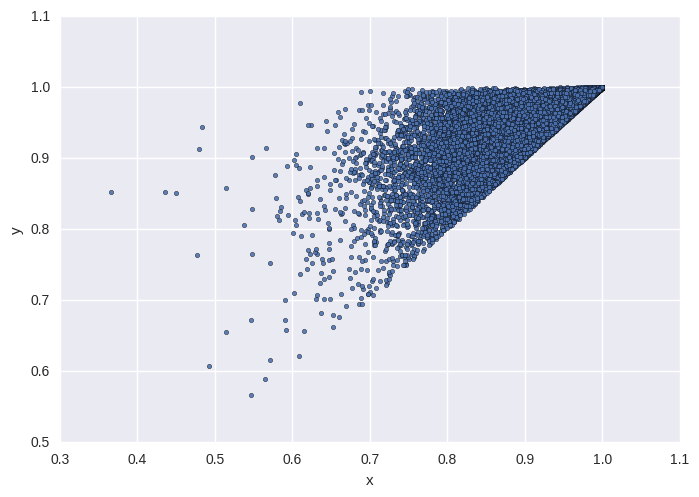

In [56]:
df_allxys.plot(kind='scatter', x='x', y='y', s=10,alpha=0.9)

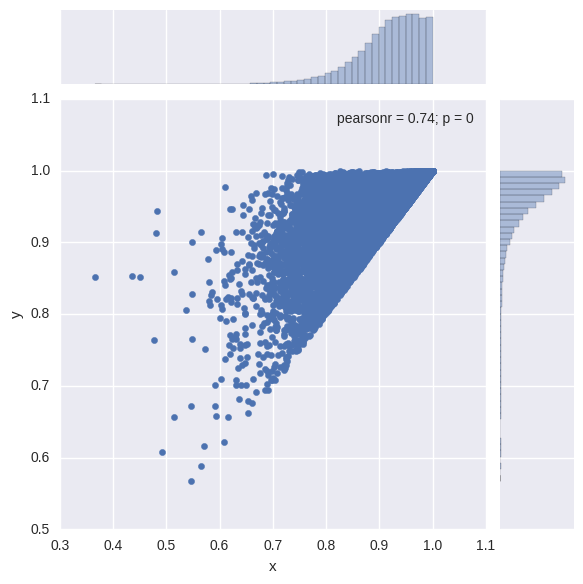

In [54]:
sns.jointplot(data=df_allxys, x='x', y='y')

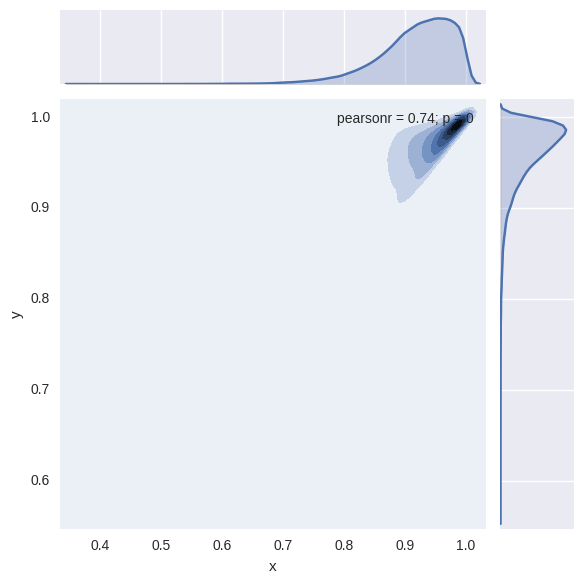

In [55]:
sns.jointplot(data=df_allxys, x='x', y='y',kind='kde')